자체 데이터셋 평가

# GPU 할당

In [1]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


2025-03-13 19:47:40.827245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 19:47:40.842460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 19:47:40.847262: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 19:47:40.862992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 19:47:41.805348: W tensorflow/compiler/tf2

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2025-03-13 19:47:43.376364: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20484 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 필요한 라이브러리 로드

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 모델 로드

In [4]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
model = load_model(model_path)

# 건축물 데이터셋

In [5]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)/real"

In [6]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 48, Real: 28


Found 76 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741862892.701547  565251 service.cc:146] XLA service 0x7175f40049a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741862892.701624  565251 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2025-03-13 19:48:12.850555: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-13 19:48:13.876322: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
202

 7/76 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 

I0000 00:00:1741862903.136560  565251 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step
[[7.04898357e-01]
 [8.97953987e-01]
 [4.74537820e-01]
 [7.82905877e-01]
 [9.67305839e-01]
 [8.18648994e-01]
 [1.53897032e-01]
 [1.64323524e-01]
 [1.76014736e-01]
 [2.25860378e-04]
 [8.15367922e-02]
 [1.36752438e-03]
 [1.03877082e-01]
 [6.45359905e-05]
 [5.57119660e-02]
 [9.75778997e-01]
 [8.90844524e-01]
 [2.95050472e-01]
 [5.13746679e-01]
 [5.24193840e-03]
 [5.30339126e-03]
 [1.28488871e-03]
 [5.80940978e-05]
 [3.39503944e-01]
 [3.47613215e-01]
 [3.65715384e-01]
 [9.68399569e-02]
 [2.57252216e-01]
 [1.10257424e-01]
 [8.09498597e-03]
 [3.25698882e-01]
 [2.09075704e-01]
 [4.70993876e-01]
 [9.33705457e-03]
 [3.45776528e-01]
 [9.85029280e-01]
 [2.18068630e-01]
 [6.21184647e-01]
 [1.38646916e-01]
 [8.59741807e-01]
 [1.23933159e-01]
 [3.12603027e-01]
 [2.25746259e-01]
 [1.11257568e-01]
 [2.54560143e-01]
 [2.54560143e-01]
 [8.01790476e-01]
 [8.01790476e-01]
 [9.35886681e-01]
 [9.98662829e-01]
 [4.56698209e-01]
 [1.58307761e-01]
 [6.47267461e-01]
 [2.3

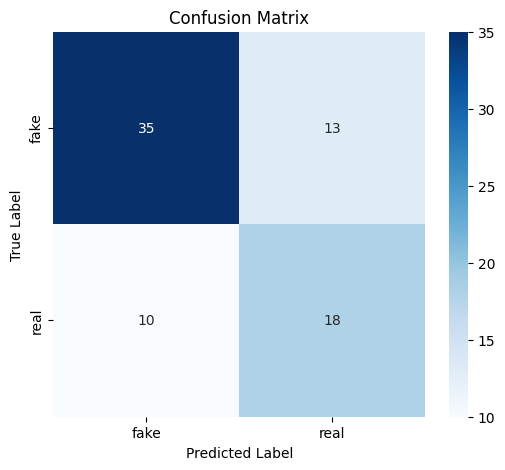


Classification Report:
              precision    recall  f1-score   support

        fake       0.78      0.73      0.75        48
        real       0.58      0.64      0.61        28

    accuracy                           0.70        76
   macro avg       0.68      0.69      0.68        76
weighted avg       0.71      0.70      0.70        76



In [7]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 동물

In [8]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물/real"

In [9]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 51, Real: 22


Found 73 images belonging to 2 classes.


 1/73 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
[[0.6254756 ]
 [0.14417662]
 [0.00719439]
 [0.06914662]
 [0.35427928]
 [0.03203359]
 [0.67911536]
 [0.4558026 ]
 [0.06983084]
 [0.19513473]
 [0.847193  ]
 [0.6081754 ]
 [0.05880705]
 [0.02990784]
 [0.02772118]
 [0.08402285]
 [0.04270652]
 [0.80646884]
 [0.3915626 ]
 [0.22032279]
 [0.01149737]
 [0.23000066]
 [0.1101321 ]
 [0.2831503 ]
 [0.41456932]
 [0.05151693]
 [0.05825199]
 [0.10857087]
 [0.07341407]
 [0.03412495]
 [0.0142949 ]
 [0.02644158]
 [0.02644158]
 [0.02713588]
 [0.07675423]
 [0.99998987]
 [0.99979514]
 [0.9661456 ]
 [0.9887278 ]
 [0.81153905]
 [0.9311788 ]
 [0.36353323]
 [0.36913514]
 [0.7012812 ]
 [0.00248991]
 [0.00151365]
 [0.02126818]
 [0.06283581]
 [0.88088346]
 [0.07443307]
 [0.14634685]
 [0.9014873 ]
 [0.99918526]
 [0.9797894 ]
 [0.90121   ]
 [0.641913  ]
 [0.99607456]
 [0.9841564 ]
 [0.08215197]
 [0.59255975]
 [0.6754403 ]
 [0.9466175 ]
 [0.99965596]
 [0.9948868 ]
 [0.9960711 ]
 [0.19065583]
 [0.89814   ]
 [0.9607863 ]
 [0.9919

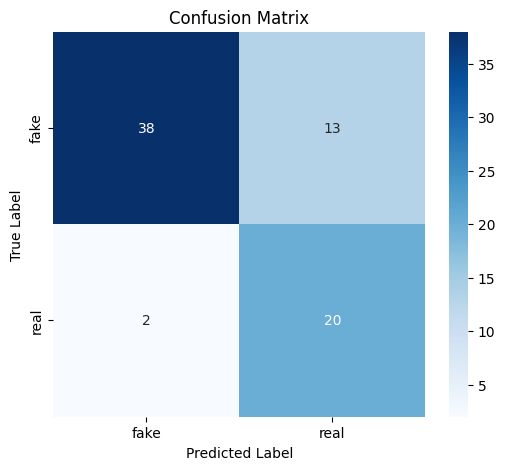


Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.75      0.84        51
        real       0.61      0.91      0.73        22

    accuracy                           0.79        73
   macro avg       0.78      0.83      0.78        73
weighted avg       0.85      0.79      0.80        73



In [10]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 사물

In [11]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물/real"

In [12]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 40, Real: 29


Found 68 images belonging to 2 classes.


 4/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
[[2.78209406e-03]
 [2.27694660e-02]
 [9.05087143e-02]
 [8.92006978e-02]
 [1.66692509e-04]
 [3.76771986e-02]
 [1.47002473e-01]
 [2.69598871e-01]
 [2.27327466e-01]
 [5.20249316e-03]
 [1.07307404e-01]
 [1.09435439e-01]
 [3.42087336e-02]
 [4.93064895e-02]
 [9.50712919e-01]
 [4.15501595e-01]
 [7.99647212e-01]
 [8.12929794e-02]
 [5.37697859e-02]
 [3.18166427e-02]
 [6.86319694e-02]
 [9.61172730e-02]
 [4.07017201e-01]
 [1.62628666e-01]
 [3.46526146e-01]
 [7.21106753e-02]
 [4.35801819e-02]
 [1.92219779e-01]
 [1.97231591e-01]
 [1.75925717e-01]
 [1.29469052e-01]
 [2.05736786e-01]
 [7.03153163e-02]
 [8.40198174e-02]
 [2.83961315e-02]
 [2.97000725e-03]
 [6.19709909e-01]
 [6.06809892e-02]
 [6.38030231e-01]
 [3.06091249e-01]
 [2.54861534e-01]
 [4.36112046e-01]
 [8.53606224e-01]
 [7.44161904e-01]
 [8.62257838e-01]
 [9.33509707e-01]
 [4.10834342e-01]
 [1.50598407e-01]
 [8.35124969e-01]
 [1.37496337e-01]
 [1.67940613e-02]
 [1.45983130e-01]
 [9.43977296e-01]
 [2.80

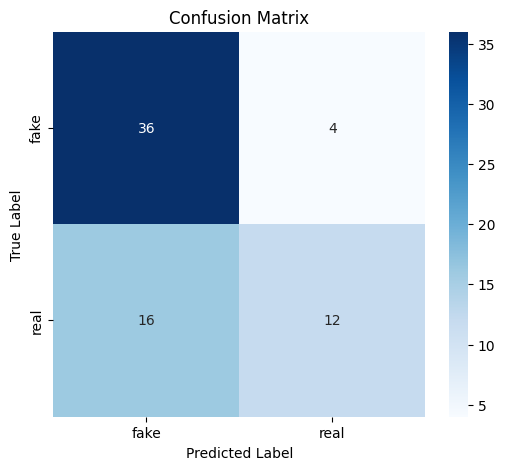


Classification Report:
              precision    recall  f1-score   support

        fake       0.69      0.90      0.78        40
        real       0.75      0.43      0.55        28

    accuracy                           0.71        68
   macro avg       0.72      0.66      0.66        68
weighted avg       0.72      0.71      0.68        68



In [13]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 실내공간

In [14]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간/real"

In [15]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 16, Real: 6


Found 21 images belonging to 2 classes.


 4/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
[[0.04893018]
 [0.47898915]
 [0.23120195]
 [0.97058094]
 [0.97058094]
 [0.45277473]
 [0.45277473]
 [0.8427001 ]
 [0.3694307 ]
 [0.01201189]
 [0.00359317]
 [0.01438568]
 [0.02517125]
 [0.31781906]
 [0.36975864]
 [0.2661545 ]
 [0.9373643 ]
 [0.26669502]
 [0.994991  ]
 [0.10807013]
 [0.10807013]]
Model Accuracy: 0.7143


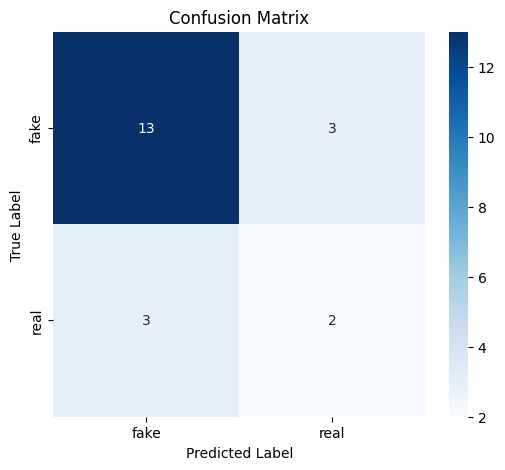


Classification Report:
              precision    recall  f1-score   support

        fake       0.81      0.81      0.81        16
        real       0.40      0.40      0.40         5

    accuracy                           0.71        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.71      0.71      0.71        21



In [16]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 음식

In [17]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 76, Real: 28


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식/real"

In [19]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 76, Real: 28


In [21]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
model = load_model(model_path)

Found 101 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step
[[9.5457536e-01]
 [9.9650687e-01]
 [9.9789399e-01]
 [9.9528056e-01]
 [1.4182043e-02]
 [4.2086679e-01]
 [2.7795950e-01]
 [8.4263301e-03]
 [1.1576612e-01]
 [6.4771641e-03]
 [2.7021831e-01]
 [1.1172198e-01]
 [3.0880790e-02]
 [9.1544956e-02]
 [6.9640923e-01]
 [1.8242188e-01]
 [7.7422269e-02]
 [4.4562940e-02]
 [4.9694709e-02]
 [2.8740713e-01]
 [4.4468018e-01]
 [1.7547445e-01]
 [8.2179505e-01]
 [4.4468018e-01]
 [7.7521706e-01]
 [7.8964061e-01]
 [8.8630486e-01]
 [1.6053618e-01]
 [7.3564792e-01]
 [7.6726365e-01]
 [9.4506037e-01]
 [9.3184173e-01]
 [1.2950917e-01]
 [4.5356533e-01]
 [1.0160146e-01]
 [2.8444105e-01]
 [7.5584787e-01]
 [7.5584787e-01]
 [2.1353092e-02]
 [8.4159836e-02]
 [8.0243282e-02]
 [9.3402386e-02]
 [1.9571429e-01]
 [1.1987637e-03]
 [9.6224932e-05]
 [1.1128248e-01]
 [1.1293284e-01]
 [5.5030249e-02]
 [1.8481077e-01]
 [1.8048327e-01]
 [9.7667575e-03]
 [8.2685041e-01]
 [4.1052160e-01]
 [7.4954653e-01]
 [1.4748780e-01]
 [8.1468809e-01]
 [5.5

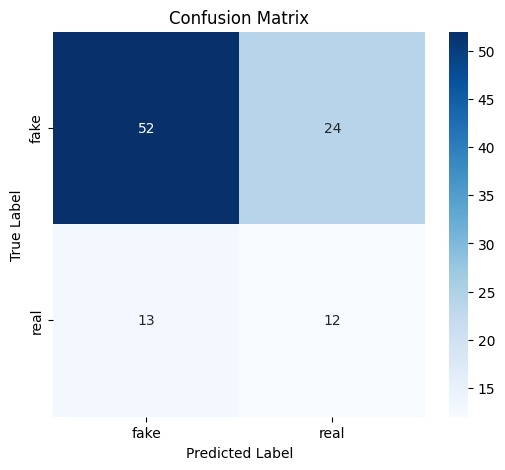


Classification Report:
              precision    recall  f1-score   support

        fake       0.80      0.68      0.74        76
        real       0.33      0.48      0.39        25

    accuracy                           0.63       101
   macro avg       0.57      0.58      0.57       101
weighted avg       0.68      0.63      0.65       101



In [22]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 인물

In [23]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 6, Real: 4


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물/real"

In [25]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 6, Real: 4


In [28]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
model = load_model(model_path)

Found 10 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step
[[0.01730872]
 [0.21533085]
 [0.17414533]
 [0.13931541]
 [0.12213163]
 [0.00377311]
 [0.62005347]
 [0.2077292 ]
 [0.16205381]
 [0.17170203]]
Model Accuracy: 0.7000


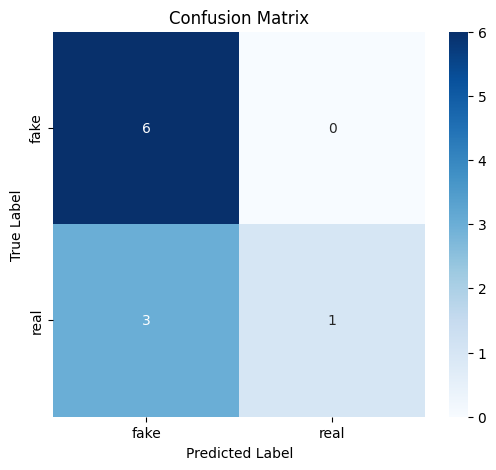


Classification Report:
              precision    recall  f1-score   support

        fake       0.67      1.00      0.80         6
        real       1.00      0.25      0.40         4

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



In [29]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 풍경

In [30]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 90, Real: 42


In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)/real"

In [33]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 90, Real: 42


In [ ]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
model = load_model(model_path)

Found 122 images belonging to 2 classes.


  4/122 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
[[0.6806289 ]
 [0.93015885]
 [0.04198333]
 [0.33093908]
 [0.9574407 ]
 [0.84490174]
 [0.20941131]
 [0.94405377]
 [0.9340155 ]
 [0.9903763 ]
 [0.8300643 ]
 [0.20598328]
 [0.0797137 ]
 [0.9024134 ]
 [0.8718362 ]
 [0.45284295]
 [0.99417526]
 [0.99617696]
 [0.8399935 ]
 [0.93132883]
 [0.98510695]
 [0.6931249 ]
 [0.12091379]
 [0.9595847 ]
 [0.99126387]
 [0.8955217 ]
 [0.90877527]
 [0.9589691 ]
 [0.36800545]
 [0.32625115]
 [0.9287557 ]
 [0.47559154]
 [0.98900944]
 [0.00598035]
 [0.92711943]
 [0.9757101 ]
 [0.9706755 ]
 [0.99579453]
 [0.22163452]
 [0.48037186]
 [0.00739175]
 [0.07157359]
 [0.9628238 ]
 [0.22401631]
 [0.9733829 ]
 [0.9565209 ]
 [0.01648417]
 [0.9824253 ]
 [0.95121145]
 [0.7944812 ]
 [0.94093555]
 [0.10525543]
 [0.01447047]
 [0.06093998]
 [0.96348035]
 [0.18738016]
 [0.6393932 ]
 [0.00356462]
 [0.17960487]
 [0.9487889 ]
 [0.0293229 ]
 [0.33275077]
 [0.01339777]
 [0.05265506]
 [0.7337343 ]
 [0.02185622]
 [0.76361316]
 [0.8590583 ]
 [0.79

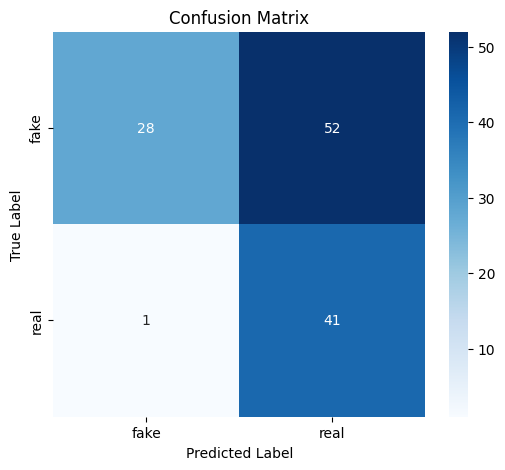


Classification Report:
              precision    recall  f1-score   support

        fake       0.97      0.35      0.51        80
        real       0.44      0.98      0.61        42

    accuracy                           0.57       122
   macro avg       0.70      0.66      0.56       122
weighted avg       0.78      0.57      0.55       122



In [34]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 풍경화

In [35]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 111, Real: 0


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)/real"

In [37]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 111, Real: 0


In [39]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
model = load_model(model_path)

Found 92 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
[[1.45533457e-04]
 [9.08497989e-01]
 [8.88572872e-01]
 [9.94575381e-01]
 [9.90309060e-01]
 [9.46474552e-01]
 [5.93204081e-01]
 [8.76157403e-01]
 [1.76102802e-01]
 [8.49487543e-01]
 [4.71898705e-01]
 [4.78108615e-01]
 [9.07286227e-01]
 [9.01508152e-01]
 [7.94436097e-01]
 [8.05222869e-01]
 [7.55886197e-01]
 [2.32796714e-01]
 [8.19565773e-01]
 [7.17163861e-01]
 [7.33723998e-01]
 [2.45942287e-02]
 [7.71870136e-01]
 [1.38262333e-02]
 [9.96879697e-01]
 [1.08440146e-01]
 [9.70900357e-01]
 [1.73761137e-02]
 [1.47697166e-01]
 [1.06507272e-01]
 [6.99229240e-02]
 [9.84586120e-01]
 [9.98400509e-01]
 [9.63573933e-01]
 [9.59583640e-01]
 [9.96268511e-01]
 [8.26447904e-01]
 [3.57539922e-01]
 [9.50543940e-01]
 [9.98215437e-01]
 [4.76916321e-02]
 [9.72688437e-01]
 [7.85357237e-01]
 [9.88287032e-01]
 [8.94000351e-01]
 [9.71022606e-01]
 [7.65086710e-01]
 [7.76344478e-01]
 [8.14115822e-01]
 [9.84730482e-01]
 [9.04820979e-01]
 [8.44426811e-01]
 [5.93254149e-01]
 [9.9

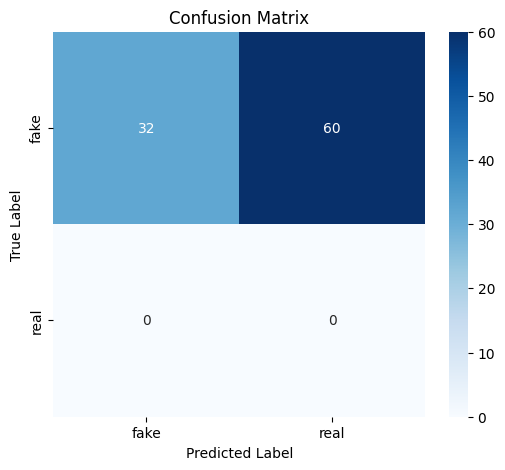


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.35      0.52        92
        real       0.00      0.00      0.00         0

    accuracy                           0.35        92
   macro avg       0.50      0.17      0.26        92
weighted avg       1.00      0.35      0.52        92



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [40]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 흑백사진

In [41]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 11, Real: 3


In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진/real"

In [43]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 11, Real: 3


In [24]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

Found 14 images belonging to 2 classes.


 1/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.06554352]
 [0.04350508]
 [0.05180035]
 [0.07396573]
 [0.09789239]
 [0.01910481]
 [0.00462563]
 [0.7645095 ]
 [0.9140981 ]
 [0.53219694]
 [0.25280586]
 [0.65303034]
 [0.92425036]
 [0.0519803 ]]
Model Accuracy: 0.7143


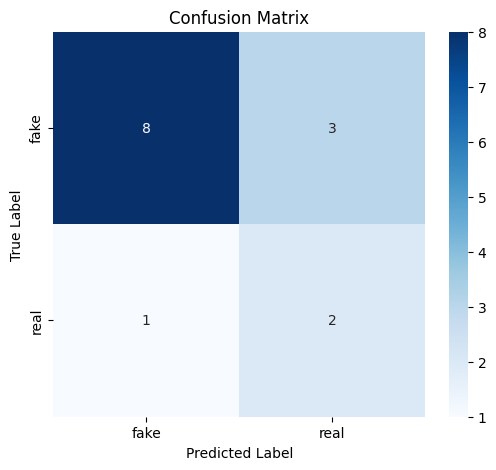


Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.73      0.80        11
        real       0.40      0.67      0.50         3

    accuracy                           0.71        14
   macro avg       0.64      0.70      0.65        14
weighted avg       0.78      0.71      0.74        14



In [44]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
